# K - Nearest Neighbors (KNN)
@Yu-Wei Hsu

Set up environment

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# Set up style and size for visualization
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 20,"figure.figsize":(18,8)})

In [ ]:
# Acquire dataset
df = pd.read_csv('heart.csv')
print('Shape of dataset',df.shape)

Shape of dataset (1025, 14)


EDA

This dataset consists of four databases, Cleveland, Hungary, Switzerland, and Long Beach V with 14 attributs. The discription of dataset are retrieved from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. We would like to use these descriptions for interpretation purpose.

Data Description:

- age: Age in years
- sex: Sex (1 = male; 0 = female)
- cp: Chest pain type (0 = typical angina; 1 = atypical angina; 2  non-anginal pain; 3 = asymptomatic)
- trestbps: Resting blood pressure in mm Hg on admission to the hospital
- chol: Serum cholestoral in mg/dl
- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: Resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: Maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2: = downsloping)
- ca: Number of major vessels (0-3) colored by flourosopy
- thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
- target: Diagnosis of heart disease (0 = no disease, 1 = disease)


In [ ]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [ ]:
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Check unique value in each feature
for col in df.columns:
  print('{}: {}'.format(col,df[col].unique()))

age: [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex: [1 0]
cp: [0 1 2 3]
trestbps: [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol: [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs: [0 1]

In [ ]:
# Check missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Check outliers
df[(np.abs(stats.zscore(df)) > 3).all(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


- There is no missing value, garbage data or outlier in this dataset.

Visualization

In [ ]:
# Slice column for numerical and categorical features
num_col = ['age','trestbps','chol','thalach','oldpeak']
cat_col = [c for c in df.columns if c not in num_col]
cat_col.remove('target')

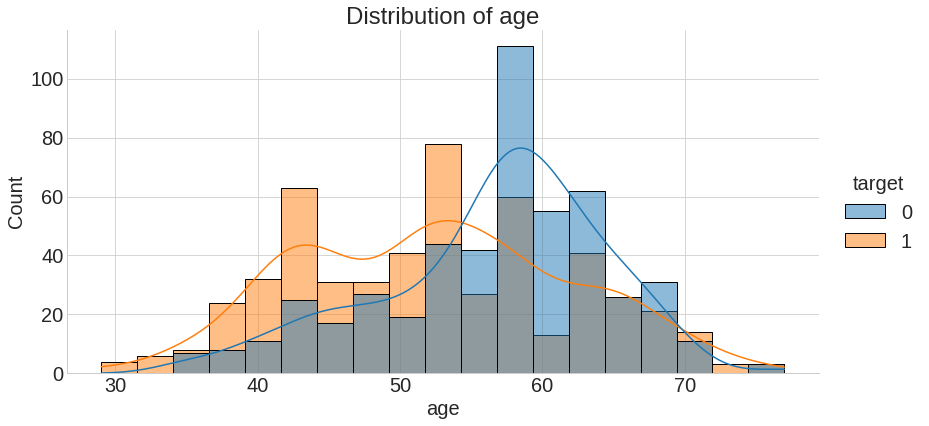

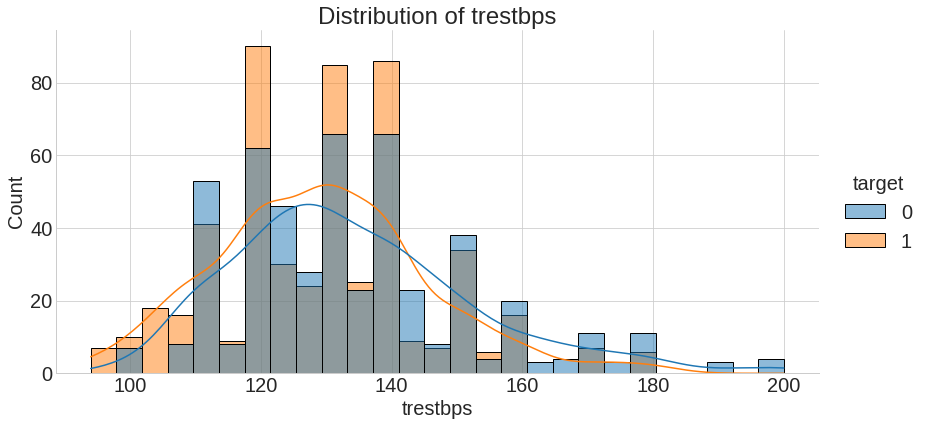

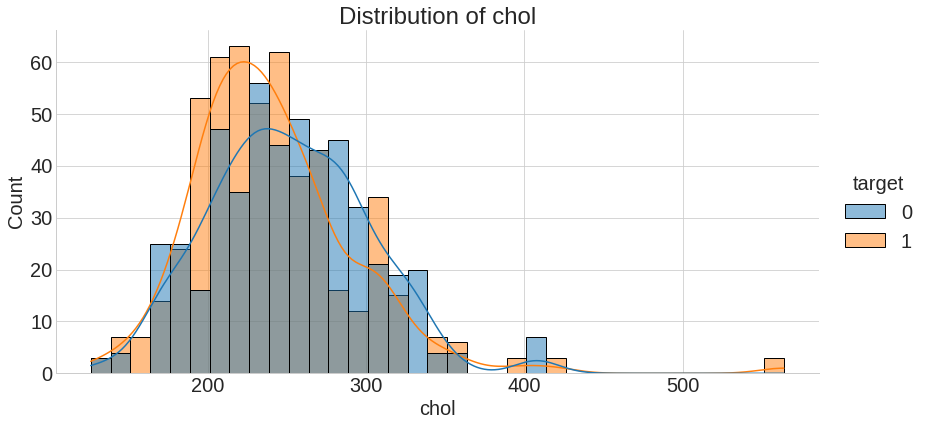

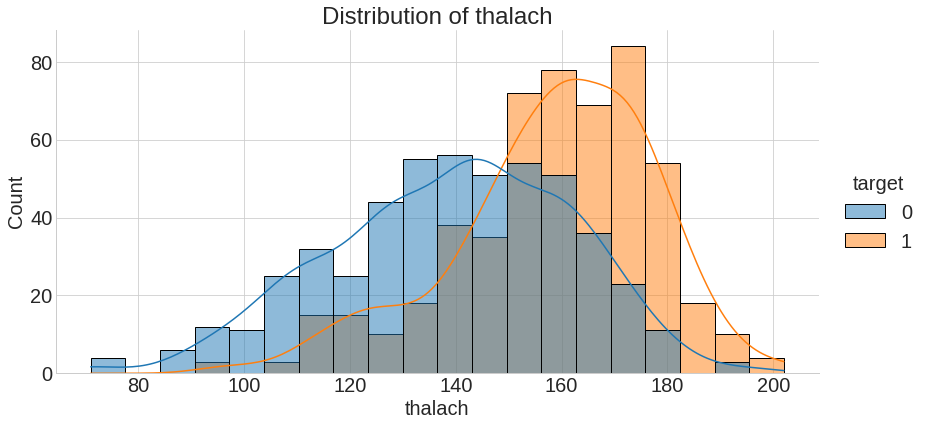

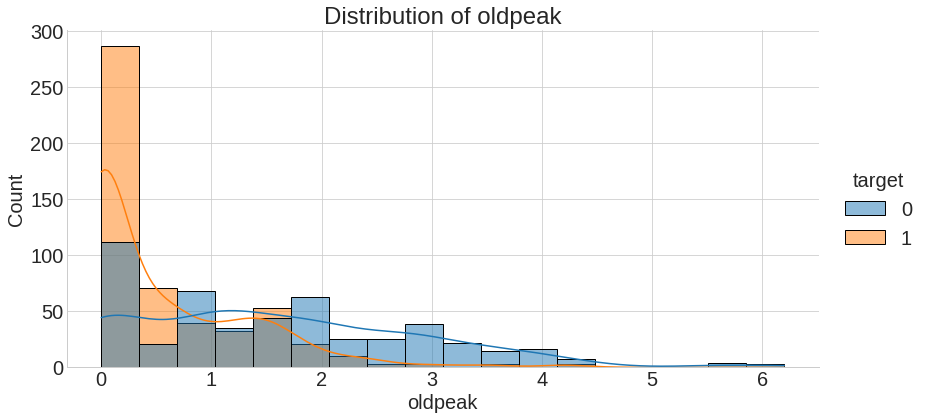

In [ ]:
# Plot the density plot and histogram for numerical features
for col in num_col:
  sns.displot(data= df, x = col, hue = 'target',kde=True,height=6,aspect=2)
  title = 'Distribution of '+ str(col)
  plt.title(title)
  plt.show()

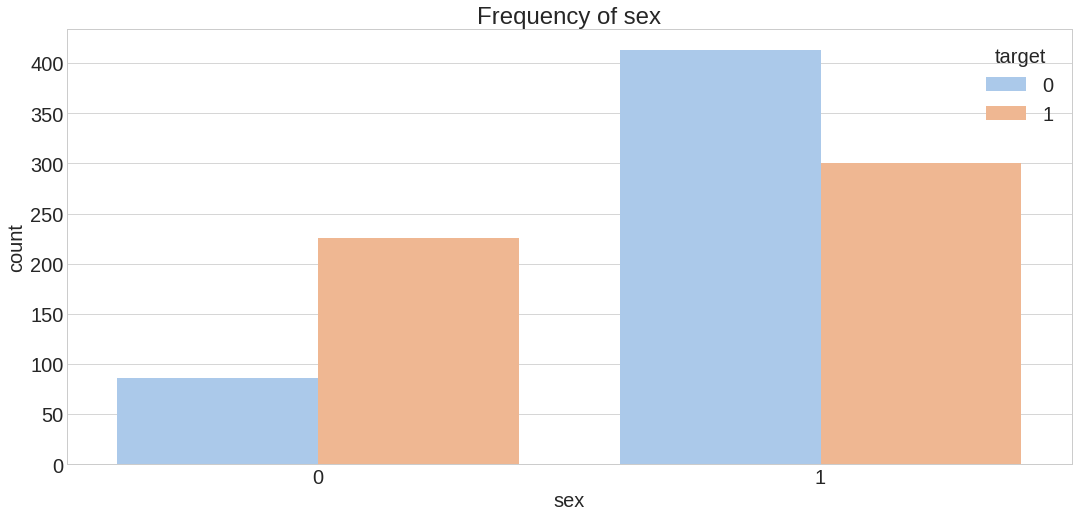

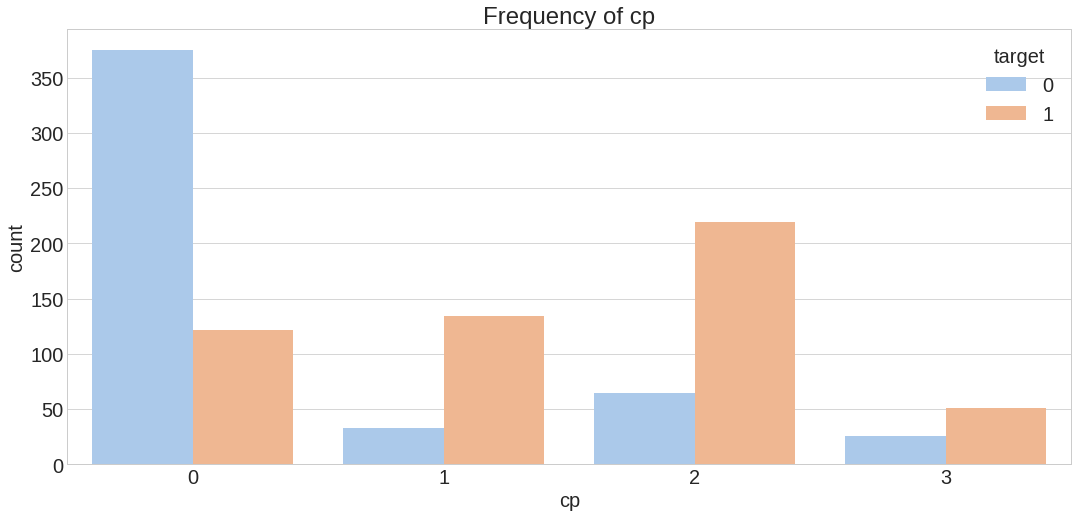

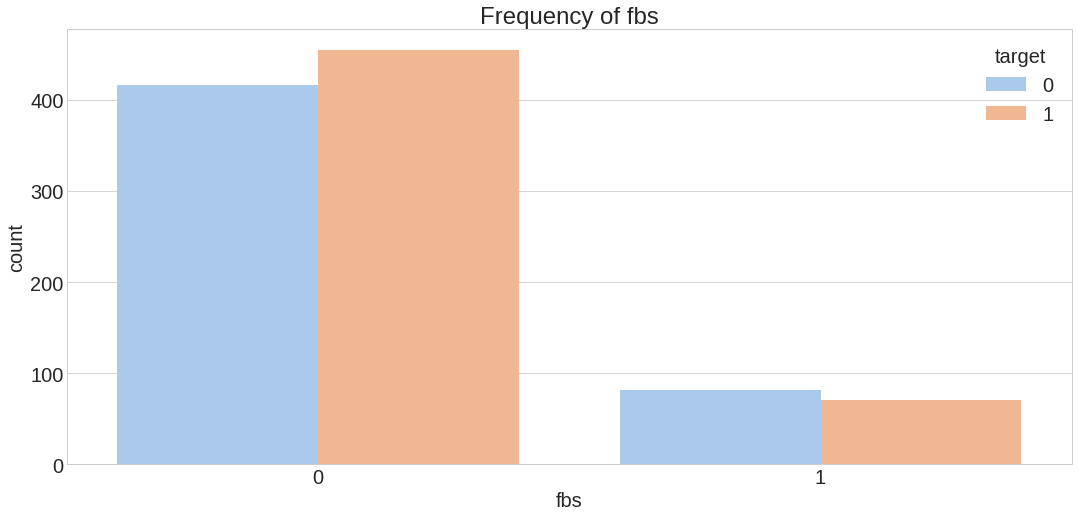

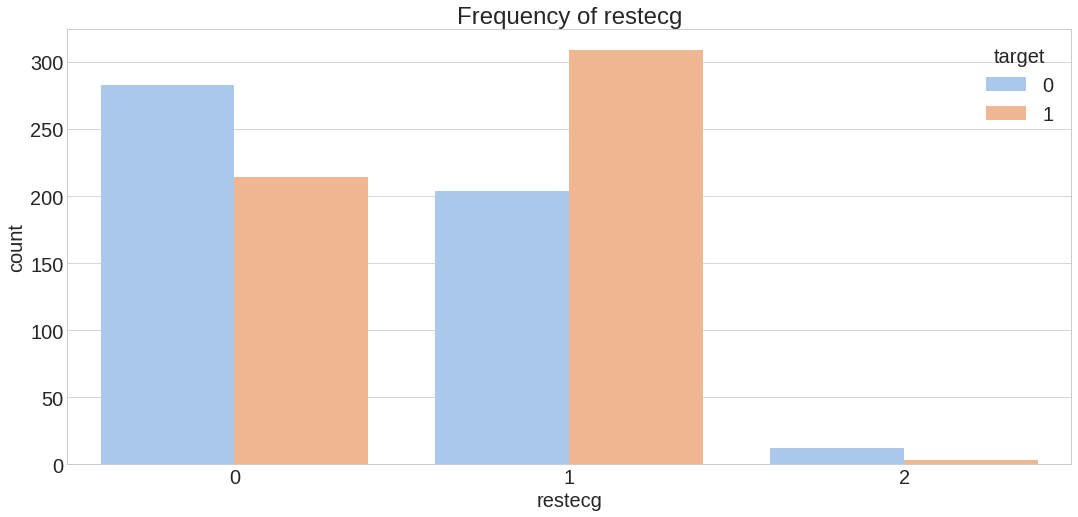

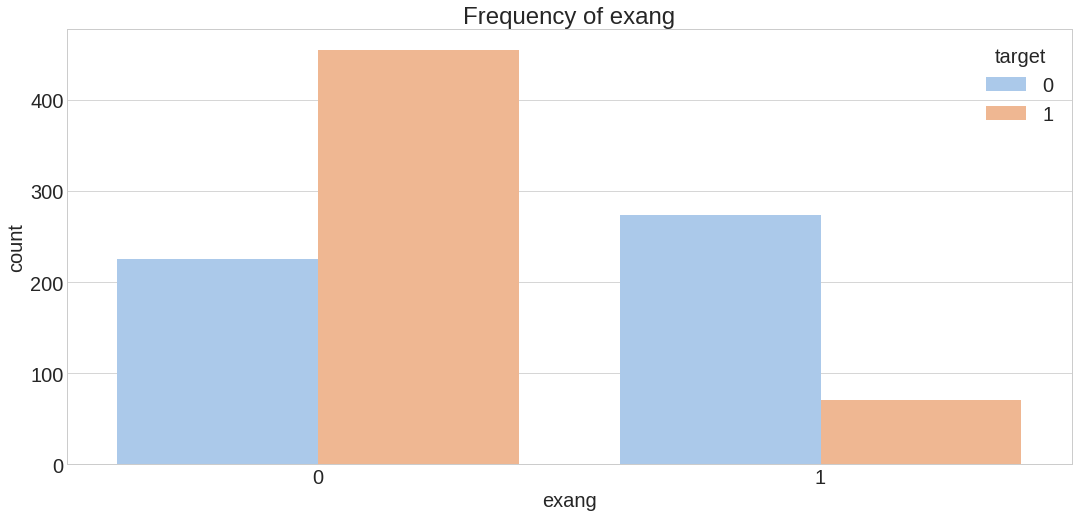

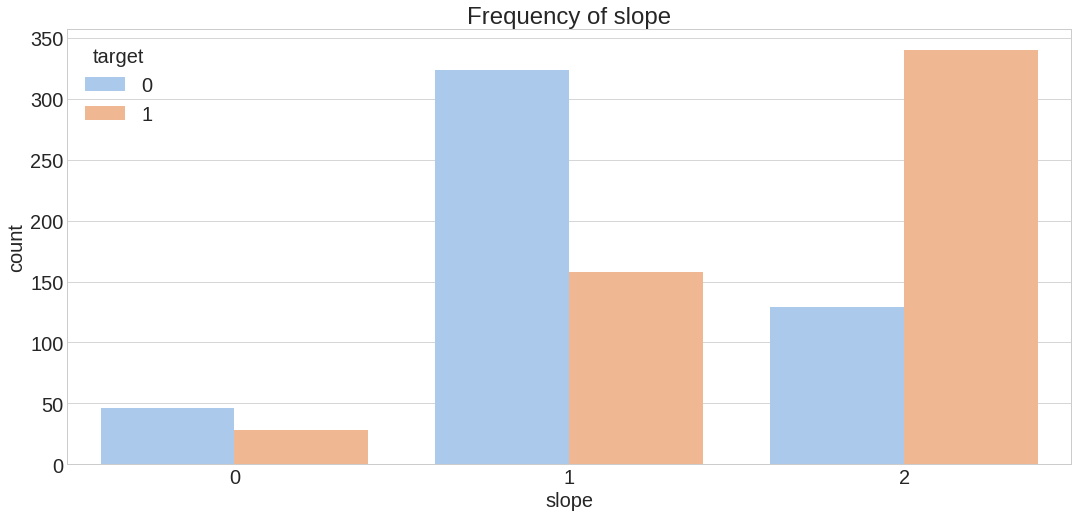

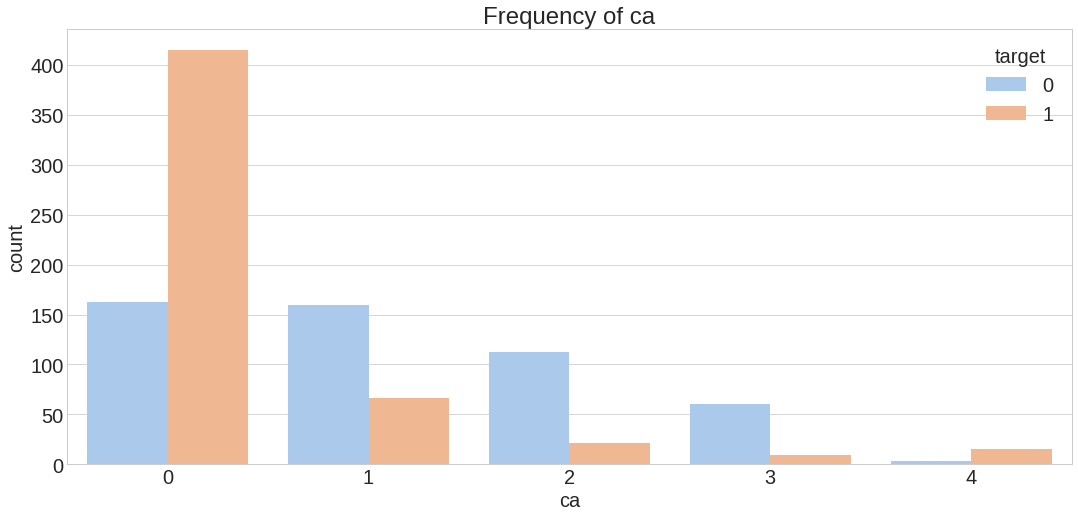

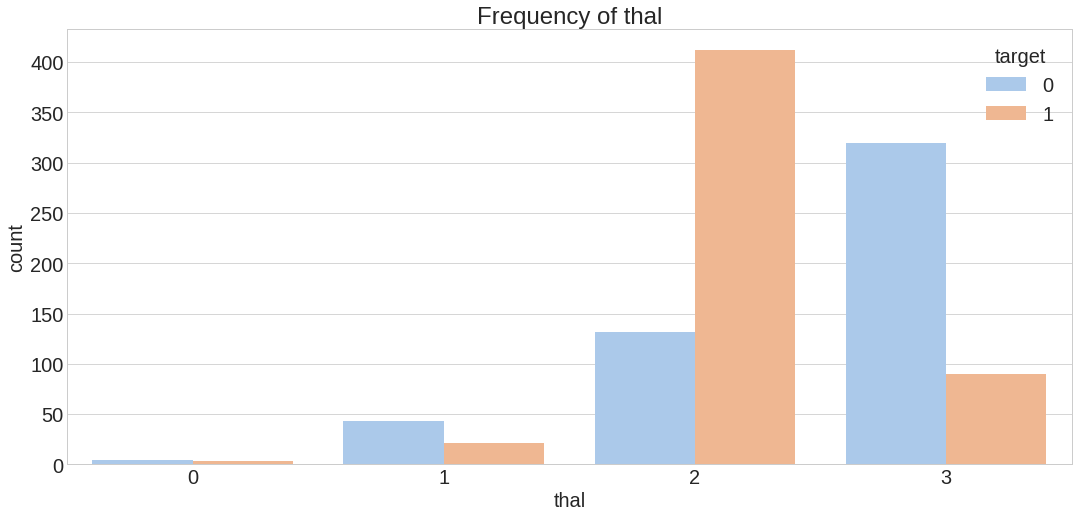

In [ ]:
# Histogram for categorical feature
for col in cat_col:
  ax = sns.countplot(x=col, hue='target', palette='pastel',data=df)
  title = 'Frequency of '+str(col)
  plt.title(title)
  plt.show()

In [ ]:
# Count the percentage of target
df['target'].value_counts(normalize = True)

1    0.513171
0    0.486829
Name: target, dtype: float64

Preprocessing data

In [ ]:
# Normalized numerical data
scaler  = MinMaxScaler()
df[num_col] = scaler.fit_transform(df[num_col])

# Assign X and y for predictor and output
X = df.iloc[:,0:-1]
y = df.iloc[:, -1]

# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Apply Model

In [ ]:
# Fit the model on train data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions for test data
y_pred = knn.predict(X_test)
   
# Accuracy score and classifiaction report
accuracy =  accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print out the result   
print("Accuracy on test dataset for KNN model = {:.2f}\n".format(accuracy))
print(cr)

Accuracy on test dataset for KNN model = 0.88

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       159
           1       0.86      0.89      0.88       149

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308



In [ ]:
# Choose K value
overall_accuracy = []
K = []
for i in range(3,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    K.append(i)
    accuracy = accuracy_score(y_test, y_pred)
    overall_accuracy.append(accuracy)
    
    print("When K = {}".format(i))
    print("Accuracy: ",accuracy)
    print()

When K = 3
Accuracy:  0.9577922077922078

When K = 4
Accuracy:  0.9090909090909091

When K = 5
Accuracy:  0.8766233766233766

When K = 6
Accuracy:  0.8733766233766234

When K = 7
Accuracy:  0.8668831168831169

When K = 8
Accuracy:  0.8636363636363636

When K = 9
Accuracy:  0.8668831168831169

When K = 10
Accuracy:  0.8538961038961039

When K = 11
Accuracy:  0.8603896103896104

When K = 12
Accuracy:  0.8474025974025974

When K = 13
Accuracy:  0.8474025974025974

When K = 14
Accuracy:  0.8441558441558441



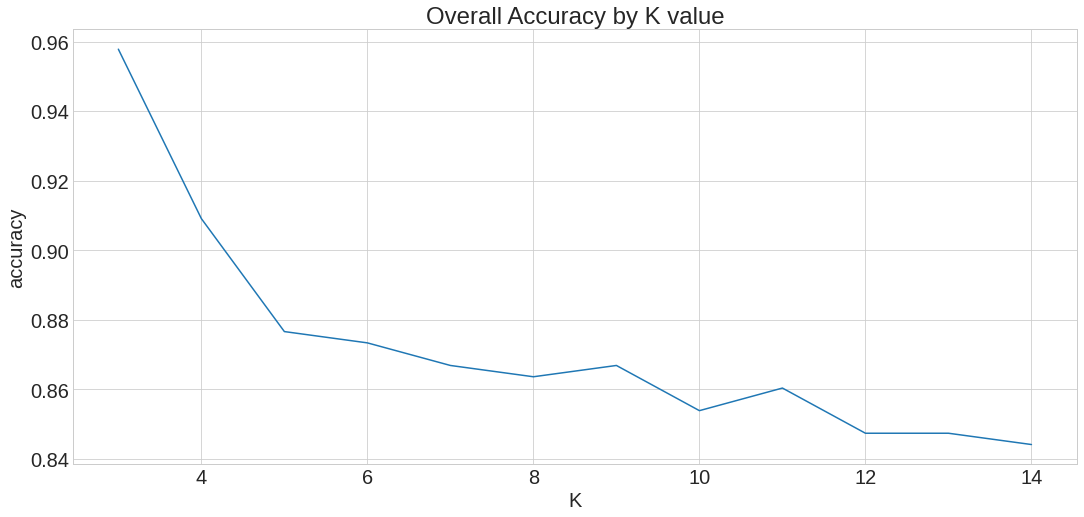

In [ ]:
# Create scorea dataframe
d = {'K': K, 'accuracy': overall_accuracy}
score_df = pd.DataFrame(d)

# Create lineplot
sns.lineplot(x='K', y='accuracy', data=score_df)
plt.title('Overall Accuracy by K value')
plt.show()

In [ ]:
# Print the best K and accuracy value
max_acc = max(score_df.accuracy)
bestK = score_df.loc[score_df.accuracy==max_acc]['K'].values[0]
print("The opitmum K value for this dataset is {} with overall accuracy {:.3f}".format(bestK,max_acc))

The opitmum K value for this dataset is 3 with overall accuracy 0.958


In [ ]:
# Fit the optimum of K with 
knn = KNeighborsClassifier(n_neighbors=bestK)
knn.fit(X_train, y_train)

# Cross validation score
cv_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
cv_score_mean = cv_scores.mean()

# Make predictions for test data
y_pred = knn.predict(X_test)
   
# Accuracy score and classifiaction report
accuracy =  accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)


# Print out the result   
print("Accuracy on test dataset of K = {} for KNN model = {:.3f}".format(bestK,accuracy))
print("\nClassification Report:")
print(cr)
print("Mean of Cross Validation score = {}".format(cv_score_mean))

Accuracy on test dataset of K = 3 for KNN model = 0.958

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.96       149

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308

Mean of Cross Validation score = 0.89391627543036


- By default, the n_neighbors is 5 for the Kneighborclassifier model, the overall accuracy is 0.88; after fitting cross-validation with ten and selecting the optimum value of K(3), the overall accuracy increases to 0.958 with a 0.894 mean cross-validation score.
> - precisions for both groups, diagnosed heart disease and no heart disease, are 0.96.
